# Artificial Intelligence - Sentiment Analysis in Marketing

In today's rapidly changing digital landscape, leveraging artificial intelligence (AI) is crucial for businesses aiming to stay competitive. Welcome to this comprehensive project, where we explore the realm of Artificial Intelligence and Sentiment Analysis in marketing, focusing on Amazon customer reviews. This project equips you with fundamental data science concepts, helping you understand sentiment analysis intricacies and enhance your portfolio and interview readiness.

### Project Overview

**Mission:** Construct, train, evaluate, and deploy an AI model predicting sentiment from genuine Amazon Echo product customer reviews. Using Python and popular libraries like Scikit-Learn, Matplotlib, and Seaborn, we dive into text data analysis and visualization. By utilizing tools like Pandas, Matplotlib, and Seaborn, we uncover patterns and insights within the textual data. We conduct exploratory data analysis, use word clouds, and clean the data by removing punctuation and stop words.

### Project Objectives

Throughout this project, you will:

- **Master Python Libraries:**
Develop proficiency in using Python libraries like Scikit-Learn, Matplotlib, and Seaborn for data analysis, visualization, and model development.

- **Conduct Exploratory Data Analysis (EDA):**
Learn how to explore and visualize data to uncover insights guiding further analysis and model design.

- **Apply Text Preprocessing Techniques:**
Understand the importance of data cleaning and text preprocessing in preparing textual data for analysis and modeling.

- **Implement Count Vectorization:**
Learn to transform text data into a suitable format for machine learning algorithms.

- **Grasp Sentiment Analysis Concepts:** 
Gain a comprehensive understanding of sentiment analysis, its methodologies, and real-world applications.

- **Train AI Models:**
Acquire hands-on experience in training AI models using various algorithms and evaluating their performance.

- **Enhance Interview Readiness:**
Develop the ability to confidently discuss data science concepts, techniques, and project experiences during interviews.

- **Build a Portfolio-Ready Project:**
Create a fully functional sentiment analysis model demonstrating proficiency in data preprocessing, feature extraction, and model training, bolstering your data science portfolio.

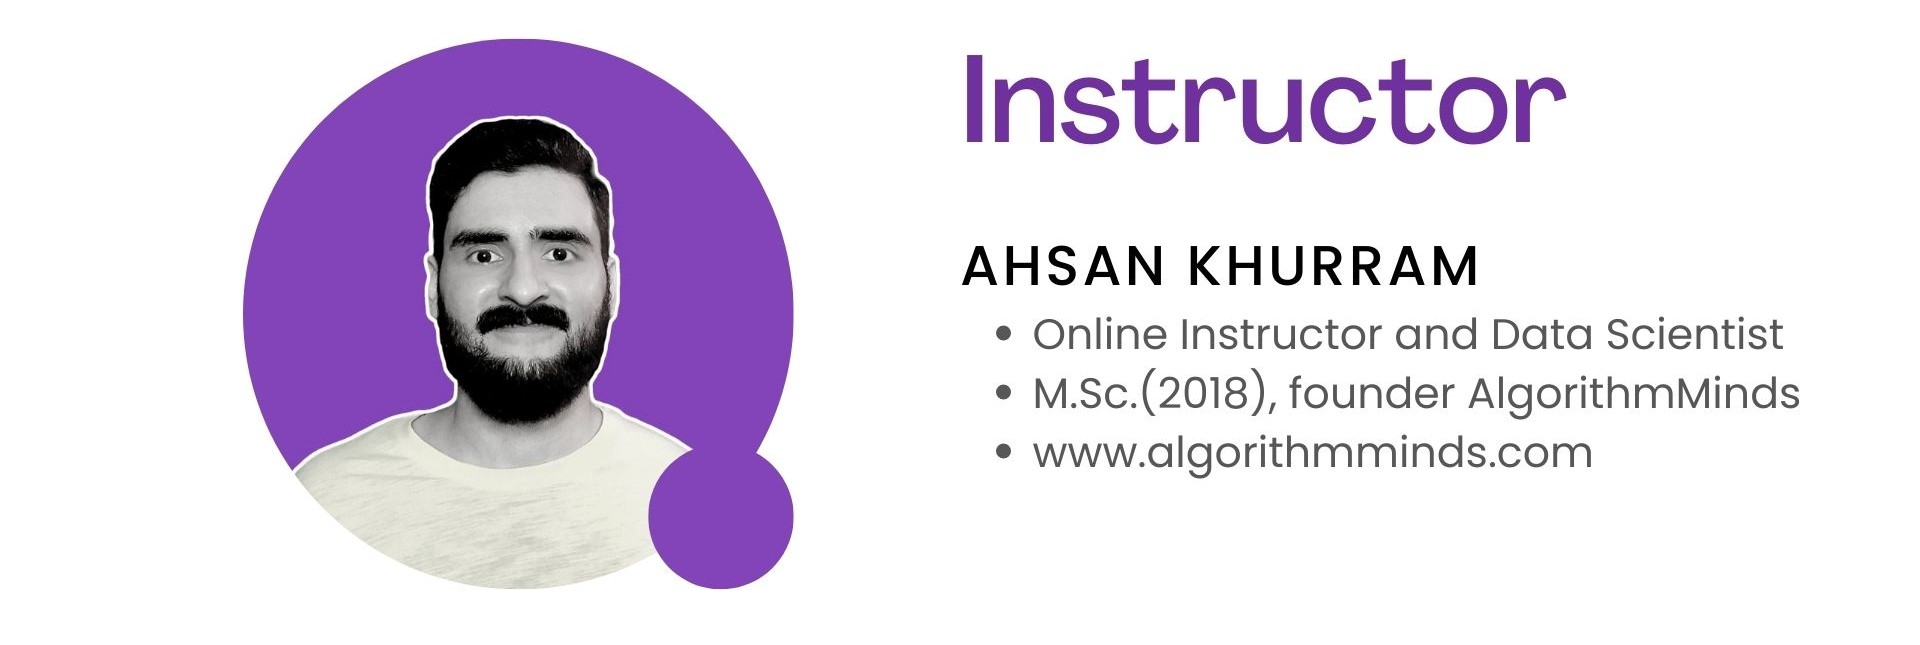

## Watch full Tutorial on YouTube: 

#### my website: www.algorithmminds.com

# Sentiment Analysis: An Overview

Sentiment Analysis, often referred to as opinion mining, is a powerful technique within the field of Natural Language Processing (NLP). At its core, sentiment analysis involves teaching machines to understand and interpret human emotions and opinions expressed within text data. By analyzing the sentiment behind words and phrases, AI models can classify text as positive, negative, or neutral, thus providing valuable insights into people's attitudes, feelings, and reactions.

### Training AI Models for Sentiment Analysis

Training AI models for sentiment analysis involves these steps:

- **Data Collection:** Gather a labeled dataset with text samples and sentiment labels (positive/negative).
- **Text Preprocessing:** Clean text by removing punctuation, special characters, and lowercase conversion.
- **Tokenization:** Break text into smaller units (tokens) like words.
- **Feature Extraction:** Convert tokens into numerical representations using techniques like TF-IDF.
- **Model Selection:** Choose an algorithm like Naïve Bayes, SVM, or RNN.
- **Model Training:** Train the model on labeled data to learn sentiment patterns.
- **Model Evaluation:** Measure model performance with metrics like accuracy and precision.
- **Deployment:** Deploy the model to predict sentiment in new text data.

### Sentiment Analysis in Marketing

Sentiment analysis is vital for businesses to understand customer opinions. It categorizes text sentiment as positive, negative, or neutral. In marketing, it helps gauge customer sentiment, refine strategies, and improve experiences. Extracting sentiments from Amazon reviews aids in feedback response and enhancing customer engagement, impacting business growth.

### Dataset Source

Data Source:  https://www.kaggle.com/sid321axn/amazon-alexa-reviews

Our dataset comprises nearly 3000 customer reviews of Amazon Alexa products such as Echo, Echo Dots, and Alexa Firesticks. It encompasses essential columns that provide a comprehensive view of customer sentiments and opinions:
- **Rating:** This column denotes the star rating given by customers, reflecting their overall satisfaction with the product.
- **Date:** The date of each review offers a temporal dimension, allowing us to analyze sentiment trends over time.
- **Variation:** This column specifies the product variant being reviewed, providing insights into sentiment variations across different product models.
- **Verified Reviews:** The review text itself contains valuable textual data that we will analyze to predict sentiments.
- **Feedback or Sentiment (0 or 1):** The sentiment label assigned to each review, where 0 represents a negative sentiment and 1 indicates a positive sentiment. This binary classification will be our target variable for training our AI model.

### Importing Essential Libraries
In this section, we set the foundation for our data science project by importing key Python libraries. These libraries have distinct roles in enhancing our analysis. Here's an overview:

Data Analysis and Visualization Libraries

- **Pandas**: Enables efficient data manipulation, analysis, and visualization using DataFrames. Ideal for handling large datasets.

- **NumPy**: Fundamental for numerical computations, providing arrays and math functions for data processing.

- **Seaborn and Matplotlib**: Visualization tools for creating insightful data representations. Seaborn offers simplicity, while Matplotlib provides flexibility.

Text Preprocessing Libraries

- **NLTK (Natural Language Toolkit)**: Offers text processing tools like stopwords removal, cleaning textual data before model training.

- **String and WordCloud**: Facilitates text preprocessing and visualization. WordCloud generates visually appealing word representations.

- **TfidfVectorizer**: Converts text data into numerical vectors, crucial for model training.

Data Splitting and Model Training Libraries

- **train_test_split**: Splits dataset into training and testing subsets, vital for unbiased model evaluation.

- **LogisticRegression and MultinomialNB**: Core machine learning algorithms for classification tasks. Logistic Regression is versatile, while Multinomial Naïve Bayes is suited for text data.

 Model Evaluation Libraries

- **Metrics and Display Tools**: Measures model performance using metrics like accuracy, precision, recall, and F1-score.

- **Classification reports and confusion matrices**: Provide detailed insights. ConfusionMatrixDisplay aids in visualizations.

In [2]:

# Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Text Preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Splitting and Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)



### Import Dataset

In [3]:
df = pd.read_csv('/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv', sep='\t')

In [4]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Data Inspection

We use df.info() to get key details about the dataset like data types, non-null counts, and memory usage. This gives us a basic understanding of the data's structure and content.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# Display the first 5 full reviews with a space in between
for index, row in df.head(5).iterrows():
    print(f"Review {index + 1}: {row['verified_reviews']}\n")

Review 1: Love my Echo!

Review 2: Loved it!

Review 3: Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.

Review 4: I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.

Review 5: Music



# Data Preprocessing:

We start by preprocessing our data. These initial steps set the foundation for later analysis and model development. Let's explore the importance of these tasks:

### Check for null values in the dataset
We use df.isnull() to create a mask that identifies null values in our dataset. This is important because null values can affect analysis and model performance.

In [7]:
null_mask   = df.isnull()            # Create a mask of null values
null_values = null_mask.sum().sum()  # Count the total number of null values
print("Number of null values:", null_values)

Number of null values: 0


# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial phase in our data science journey. It helps us uncover insights and patterns hidden in our dataset. EDA involves calculations and visualizations that provide valuable information guiding subsequent analyses and model development.

### Summary Statistics
We start by calculating summary statistics using df.describe(). This gives us an overview of key metrics like mean, median, and quartiles for numeric columns. These statistics show central tendencies, variability, and data distribution. They help identify potential outliers and anomalies.

In [8]:
print("\nSummary Statistics:")
summary_stats = df.describe()
print(summary_stats)


Summary Statistics:
            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


### Distribution of Sentiments
We analyze sentiment distribution using df['feedback'].value_counts(). This reveals the balance between positive and negative sentiments in our dataset. Understanding sentiment distribution informs us about challenges in training our sentiment prediction model.

In [9]:
print("\nDistribution of Sentiments:")
sentiment_counts = df['feedback'].value_counts()
print(sentiment_counts)


Distribution of Sentiments:
1    2893
0     257
Name: feedback, dtype: int64


### Distribution of Ratings
We examine ratings distribution with df['rating'].value_counts().sort_index(). This helps us understand customer satisfaction levels. By quantifying the distribution of ratings, we gain insights into prevalent sentiments associated with product reviews.

In [10]:
print("\nDistribution of Ratings:")
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)


Distribution of Ratings:
1     161
2      96
3     152
4     455
5    2286
Name: rating, dtype: int64


### Distribution of Variations
Analyzing df['variation'].value_counts() gives us insights into customer preferences and trends. This sheds light on popular product models, potentially guiding marketing and product strategies.

In [11]:
print("\nDistribution of Variations:")
variation_counts = df['variation'].value_counts()
print(variation_counts)


Distribution of Variations:
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


## Data Visualization
Visualizing data is a powerful way to gain insights, find patterns, and communicate complex information in a simple manner. In this section, we use data visualizations to explore our Amazon reviews dataset and understand it better.

### Distribution of Sentiments (Feedback)

We show the distribution of sentiment labels (feedback) using a bar plot. This helps us understand the balance between positive and negative sentiments in the dataset, giving us insights into the diversity of opinions expressed in Amazon reviews.

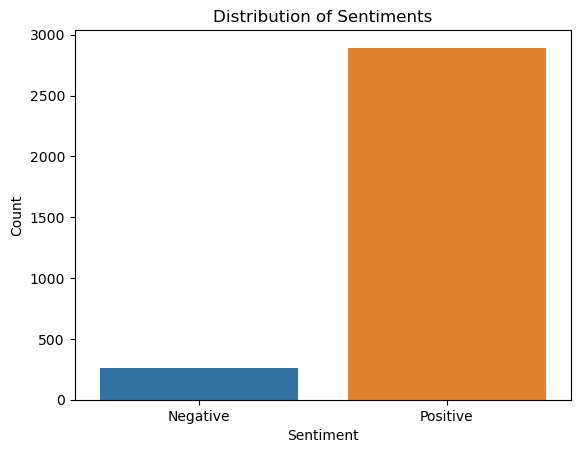

In [12]:
# Distribution of Sentiments (Feedback)
#plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='feedback')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

### Distribution of Ratings

We display the distribution of star ratings given by customers. This visualization helps us grasp the range of customer satisfaction levels and the predominant sentiments associated with different ratings.

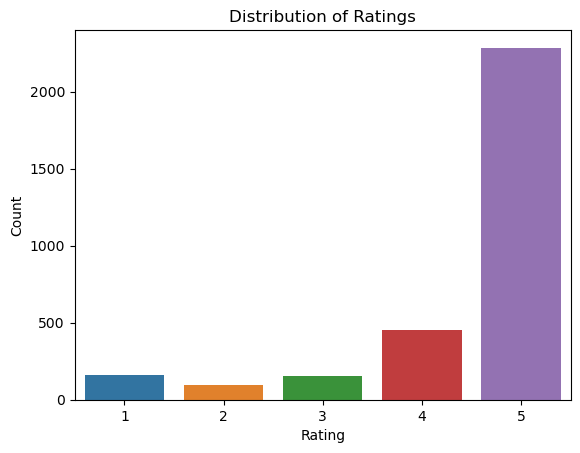

In [14]:
# Distribution of Ratings
#plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Distribution of Variations
This ordered count plot illustrates the popularity of different product variations. By visualizing customer preferences and trends in product models, we gain insights that can shape marketing strategies.

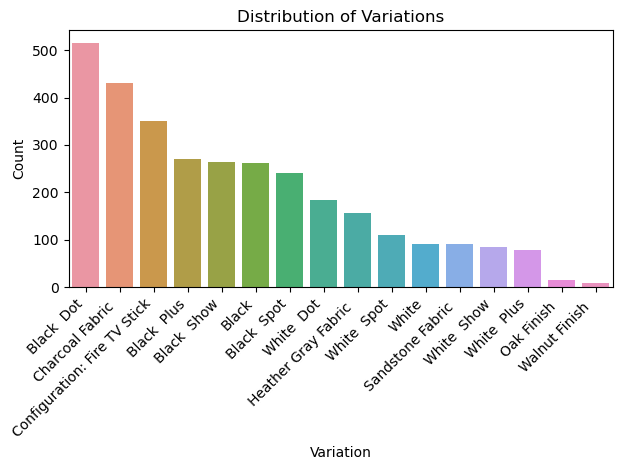

In [15]:
# Distribution of Variations
#plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='variation', order=df['variation'].value_counts().index)
plt.title('Distribution of Variations')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribution of Review Lengths
df['review_length'] = df['verified_reviews'].apply(len): Calculating and visualizing the distribution of review lengths provides insights into the extent of customer feedback. A histogram of review lengths unveils patterns in review composition and highlights the range of feedback lengths.

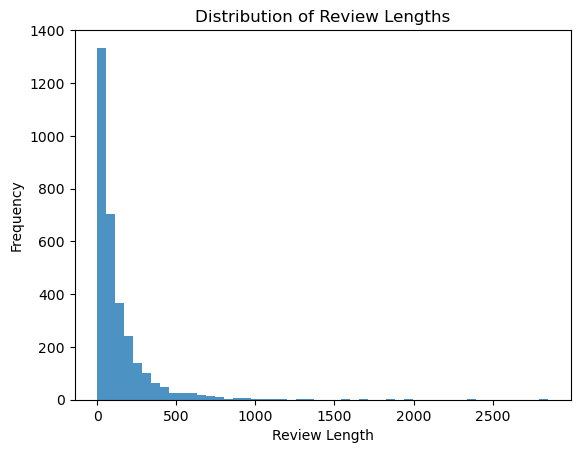

In [16]:
# Calculate the length of each review
df['review_length'] = df['verified_reviews'].apply(len)

# Plot a histogram of review lengths
#plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50,alpha=0.8)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

### Visualizing Textual Insights through Word Clouds

In this section of our data exploration, we use word clouds to visualize text. Word clouds help us see the most common words in our Amazon reviews dataset. Word clouds are great for showing insights visually. They help us see the main topics by showing the most frequent words. When we make separate word clouds for positive and negative reviews, we can see the details that shape customer opinions. These visuals help us understand sentiments better, which guides our future analyses.

**Word Cloud of Common Words**

To analyze the text, we combine all the reviews into one text: `all_reviews = ' '.join(df['verified_reviews'])`.

Using a word cloud generator, we create a visual representation of the most common words in the reviews. The size of each word shows how often it appears: `wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)`.

This word cloud gives us a quick view of the main themes and feelings in the reviews. It shows what customers focus on when they share their experiences.

**Word Clouds for Positive and Negative Reviews**

We split the positive and negative reviews to see the words that come up in each sentiment: `positive_reviews = ' '.join(df[df['feedback'] == 1]['verified_reviews'])`.

For positive reviews, we make a word cloud to highlight common words: `positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)`.

We also do the same for negative reviews: `negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)`.

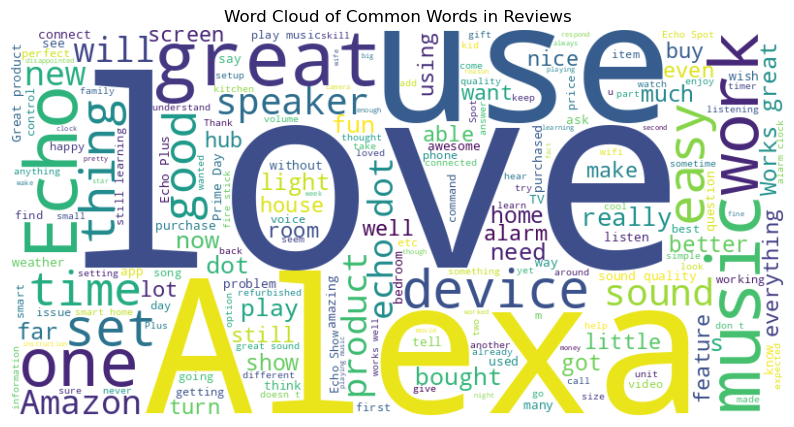

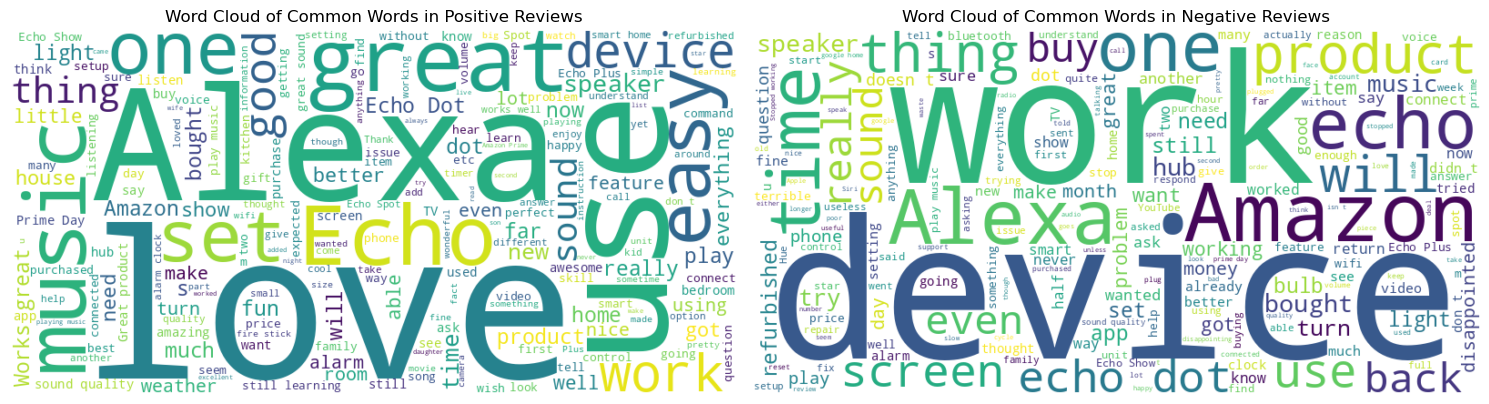

In [17]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['verified_reviews'])

# Generate a word cloud of the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews')
plt.show()

# Separate positive and negative reviews for analysis

positive_reviews = ' '.join(df[df['feedback'] == 1]['verified_reviews'])
negative_reviews = ' '.join(df[df['feedback'] == 0]['verified_reviews'])

# Generate separate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word clouds for positive and negative reviews
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Negative Reviews')

plt.tight_layout()
plt.show()

## Text Preprocessing in Sentiment Analysis

Text preprocessing is a crucial step in sentiment analysis, where we prepare raw textual data for effective machine learning analysis. This process involves several key tasks:

- **Tokenization:** Breaking text into individual words or phrases (tokens), making analysis easier.

- **Punctuation Removal and Lowercasing:** Removing punctuation marks and converting text to lowercase for consistent analysis.

- **Stopword Removal:** Removing common, uninformative words (stopwords) to focus on meaningful content.

- **Stemming:** Reducing words to their root form to treat variations as the same word.

After applying these steps, the preprocessed text becomes the foundation for feature extraction and sentiment analysis.

In [18]:
# Text Preprocessing
def preprocess_text(text):
    # Tokenization (split text into words)
    words = text.split()
    
    # Remove punctuation and convert to lowercase
    words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming (reduce words to their root form)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Reconstruct preprocessed text
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply preprocessing to the 'verified_reviews' column
df['preprocessed_reviews'] = df['verified_reviews'].apply(preprocess_text)



## Feature Extraction using TF-IDF in Sentiment Analysis
In sentiment analysis, feature extraction is a crucial step that converts processed text data into numbers, suitable for machine learning. One common technique is TF-IDF (Term Frequency-Inverse Document Frequency), which assigns weights to words in text documents. It measures word importance within a document while considering its frequency across all documents.

#### What is TF-IDF?

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical representation that gives weights to words based on their occurrence in a set of text documents. It quantifies word importance in a specific document while considering its rarity across all documents. This technique captures word significance in individual documents within the entire corpus.
Why Use TF-IDF in Sentiment Analysis?

#### TF-IDF is useful in sentiment analysis for several reasons:

- **Word Importance:** TF-IDF considers word frequency in a document (term frequency) and its rarity across the corpus (inverse document frequency). This highlights words that stand out in a review while downplaying common words in multiple reviews.

- **Contextual Relevance:** TF-IDF captures how words relate to sentiments. Words strongly associated with positive or negative feelings receive higher TF-IDF scores, helping our model identify essential sentiment-related terms.

- **Dimensionality Reduction:** By controlling the number of features (words) using techniques like max_features, TF-IDF reduces data dimensions. This enhances efficiency and helps identify key features that impact sentiment.

#### Understanding TF-IDF with an Example

Imagine customer reviews for a smartphone. "Battery life" appears often in positive reviews, praising long-lasting battery. It's rare in negative reviews. In TF-IDF, "battery life" gets a high weight for positive reviews and lower for negative reviews, reflecting its importance in positive sentiments.

#### How We Use TF-IDF

The code snippet uses Scikit-Learn's TfidfVectorizer to transform preprocessed reviews into TF-IDF features. The max_features parameter controls feature count, balancing efficiency and capturing sentiment-related terms. Matrix X holds data in a format that maintains word context, ready for input into sentiment analysis models.

In [19]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(df['preprocessed_reviews']).toarray()

In [20]:
# Display the first 10 preprocessed reviews and their corresponding TF-IDF features
for index, row in df.head(2).iterrows():
    print(f"Review {index + 1} (Preprocessed): {row['preprocessed_reviews']}")
    print(f"TF-IDF Features: {X[index]}\n")

Review 1 (Preprocessed): love echo
TF-IDF Features: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0. 

## Model Selection and Training in Sentiment Analysis
In the domain of sentiment analysis, model selection and training form the bedrock of transforming our preprocessed textual data into predictive insights. These steps involve choosing suitable machine learning algorithms and training them to accurately classify sentiments in customer reviews. 

The models employed in this project—Logistic Regression and Multinomial Naive Bayes—and their significance in sentiment analysis.

- ### Logistic Regression: 
Logistic Regression is a classic binary classification algorithm employed in sentiment analysis. It operates by learning a linear relationship between input features and the likelihood of a certain outcome, in our case, positive or negative sentiment. Logistic Regression models are interpretable, making them useful for understanding the factors driving sentiment predictions. The LogisticRegression function from Scikit-Learn is utilized to create and train the Logistic Regression model.
- ### Multinomial Naive Bayes
Multinomial Naive Bayes is another powerful classification algorithm. It's well-suited for text classification tasks due to its simplicity and effectiveness. Naive Bayes calculates the probability of a particular sentiment given the presence of certain words. Despite its "naive" assumption of independence between features, Naive Bayes often performs well in practice. The MultinomialNB function from Scikit-Learn is used to train the Multinomial Naive Bayes model.

We begin by splitting the dataset into training and testing sets. The `train_test_split` function divides the data, allowing us to train and evaluate model performance. The feature matrix `X` contains TF-IDF transformed textual data, while the target vector `y` holds sentiment labels. This division ensures unbiased model assessment.

In [21]:
# Splitting Data into Training and Testing Sets
#X = df['preprocessed_reviews']
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The `train_model` function streamlines model training. It takes `X_train` (feature matrix) and `y_train` (target vector) along with the model type (`logistic_regression` or `multinomial_nb`). The function initializes and trains the respective model.

In [22]:
# Model Training
def train_model(X_train, y_train, model_type):
    if model_type == 'logistic_regression':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif model_type == 'multinomial_nb':
        model = MultinomialNB()
    else:
        raise ValueError("Invalid model type")
    model.fit(X_train, y_train)
    return model

# Train Logistic Regression Model
logistic_regression_model = train_model(X_train, y_train, model_type='logistic_regression')

# Train Multinomial Naive Bayes Model
multinomial_nb_model = train_model(X_train, y_train, model_type='multinomial_nb')

## Model Evaluation Metrics in Sentiment Analysis
In the field of sentiment analysis, assessing how well our trained models perform is crucial. We use model evaluation metrics to measure their classification accuracy. These metrics help us understand the strengths and limitations of our models. Here, we'll discuss important model evaluation metrics: Accuracy, Precision, Recall, and F1-Score, and their significance in sentiment analysis.

**Accuracy:** Accuracy tells us how correct our model's predictions are. It's the ratio of correctly predicted instances to the total instances. However, accuracy might not be ideal when dealing with imbalanced classes.

**Precision:** Precision focuses on accurate positive predictions. It's the ratio of true positive predictions to all positive predictions. High precision means reliable positive predictions.

**Recall (Sensitivity):** Recall measures the model's ability to correctly capture all positive instances. It's the ratio of true positive predictions to all actual positive instances.

**F1-Score:** F1-Score balances precision and recall. It provides a single metric that considers both aspects. It's useful when dealing with imbalanced classes.

In [23]:
# Model Prediction and Evaluation
def evaluate_model_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression Model
logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1 = evaluate_model_predictions(logistic_regression_model, X_test, y_test)

# Evaluate Multinomial Naive Bayes Model
multinomial_nb_accuracy, multinomial_nb_precision, multinomial_nb_recall, multinomial_nb_f1 = evaluate_model_predictions(multinomial_nb_model, X_test, y_test)

# Display Evaluation Metrics for Logistic Regression Model
print("Logistic Regression Model Evaluation:\n")
print(f"Accuracy : {logistic_regression_accuracy:.2f}")
print(f"Precision: {logistic_regression_precision:.2f}")
print(f"Recall   : {logistic_regression_recall:.2f}")
print(f"F1-Score : {logistic_regression_f1:.2f}")

# Display Evaluation Metrics for Multinomial Naive Bayes Model
print("\nMultinomial Naive Bayes Model Evaluation:\n")
print(f"Accuracy : {multinomial_nb_accuracy:.2f}")
print(f"Precision: {multinomial_nb_precision:.2f}")
print(f"Recall   : {multinomial_nb_recall:.2f}")
print(f"F1-Score : {multinomial_nb_f1:.2f}")

Logistic Regression Model Evaluation:

Accuracy : 0.91
Precision: 0.91
Recall   : 1.00
F1-Score : 0.95

Multinomial Naive Bayes Model Evaluation:

Accuracy : 0.91
Precision: 0.91
Recall   : 1.00
F1-Score : 0.95


### Understanding Functions Used in Model Evaluation:

**evaluate_model_predictions(model, X_test, y_test)** 

This function performs the central task of predicting sentiments using a trained model and calculating evaluation metrics. It takes three arguments: the trained model (model), the feature matrix for the test data (X_test), and the true sentiment labels for the test data (y_test). The function proceeds as follows:
- Predicts sentiment labels (y_pred) for the test data using the trained model.
- Calculates accuracy using accuracy_score, precision using precision_score, recall using recall_score, and F1-Score using f1_score.
- Returns the computed accuracy, precision, recall, and F1-Score as a tuple.

**evaluate_model_predictions for Logistic Regression Model** 

This section utilizes the evaluate_model_predictions function to evaluate the performance of the Logistic Regression model (logistic_regression_model). The returned evaluation metrics—accuracy, precision, recall, and F1-Score—are assigned to corresponding variables (logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1).

**evaluate_model_predictions for Multinomial Naive Bayes Model**

Similar to the Logistic Regression model, this section applies the evaluate_model_predictions function to assess the performance of the Multinomial Naive Bayes model (multinomial_nb_model). The resulting evaluation metrics—accuracy, precision, recall, and F1-Score—are assigned to respective variables (multinomial_nb_accuracy, multinomial_nb_precision, multinomial_nb_recall, multinomial_nb_f1).

## Visualizing Model Performance with Confusion Matrix
The confusion matrix is a vital tool for evaluating models. It gives a clear view of how well a classification model performs. It breaks down the predictions into four categories: true positives, true negatives, false positives, and false negatives. These categories help assess the model's effectiveness.

**What is a Confusion Matrix**

A confusion matrix is a table that summarizes classification results. It shows the model's predictions in a structured way, making it easy to evaluate its performance.
Using the plot_confusion_matrix Function

The plot_confusion_matrix function is crucial for creating and displaying the confusion matrix. It takes four inputs: the trained model (model), the test data's feature matrix (X_test), the true sentiment labels for the test data (y_test), and a plot title (title).

Here's how it works:

- Calculate the model's predictions (y_pred) for the test data.
- Generate the confusion matrix using Scikit-Learn's confusion_matrix function. Labels [0, 1] represent negative and positive sentiments.
- Visualize the confusion matrix using ConfusionMatrixDisplay. Labels are set as ['Negative', 'Positive'] for clarity.
- Customize the plot using options like colormap and value formatting.

**Generating Confusion Matrices**

In this section, we use the plot_confusion_matrix function to create and show confusion matrices for both Logistic Regression and Multinomial Naive Bayes models. The plot titles—'Logistic Regression Confusion Matrix' and 'Multinomial Naive Bayes Confusion Matrix'—clearly indicate the models being evaluated.

Explore these visualizations to better understand the strengths and weaknesses of our models. These insights will improve our ability to analyze sentiments in Amazon reviews.

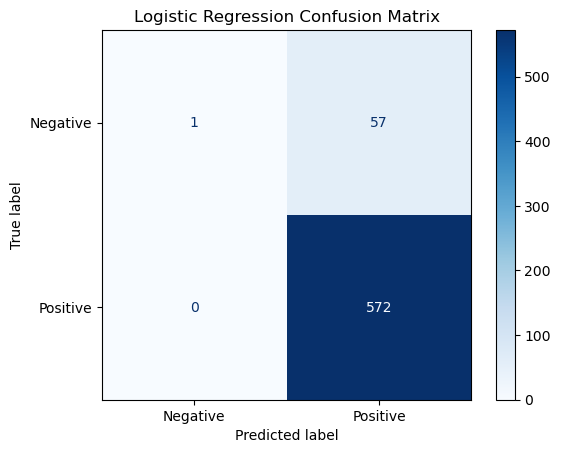

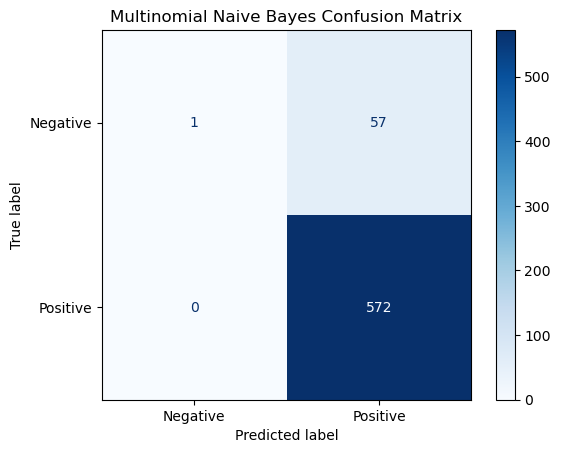

In [24]:
# Plot Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=None)
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for Logistic Regression Model
plot_confusion_matrix(logistic_regression_model, X_test, y_test, title='Logistic Regression Confusion Matrix')

# Plot Confusion Matrix for Multinomial Naive Bayes Model
plot_confusion_matrix(multinomial_nb_model, X_test, y_test, title='Multinomial Naive Bayes Confusion Matrix')